# עבודה מסכמת
# הערכת עובדים לקידום


---




> קורס- מבוא לדאטה סיינס עם יישומי פייתון למנהלים

> תאריך הגשה- 06/02/2022



---



# מבנה הדוח

1. מבוא
2. הורדת ספריות ושמירת הדאטה
3. בעיות בדאטה
4. ניקוי וסידור הדאטה
5. מידע סטטיסטי כללי על הדאטה
6. ניתוח שאלות
7. דיון והמלצות


# 1. מבוא
הנושא הנבחר הוא הערכת עובדים לקידום.

הנתונים מציגים מידע על עובדים שנאסף במחלקת משאבי אנוש של החברה בשנה שעברה (2020).

הדטאה ומצא והורד מאתר Kaggle

לינק:
https://www.kaggle.com/muhammadimran112233/employees-evaluation-for-promotion

לא ברור מה שם החברה, והאם הנתונים אמיתיים.


בחרנו לעבוד עם דאטה זה על מנת לנסות להבין את הגורמים המשפיעים או הקשורים לקידום עובדים בתעשייה על פי הדאטה המיוצג בחברה הספציפית, ננסה להבין כיצד מצטייר עובד איכותי ומשמעותי לחברה (בהנחה שעובדים אלו הם העובדים הזוכים לקידום) ובכך נלמד כיצד להיות בעצמנו עובדות טובות יותר בעתיד. כסטודנטיות לניהול חשוב לנו להבין את נקודת המבט של מנהלים על עובדיהם ושל צוות משאבי האנוש על המלצות והשפעות לקידום העובדים.

# 2. הספריות והדאטה איתו נעבוד

In [ ]:
import pandas as pd  #To read data
import numpy as np  #a fundamental Python scientific package
import seaborn as sns  #viz
import matplotlib.pyplot as plt  #To visualize
import missingno as msno  #visualising  distribution of missing values 
from matplotlib import axes #for subtitle

# ספריות לשאלת הרגרסיה
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# כל פלטות הצבעים נלקחו מהאתר- https://seaborn.pydata.org/tutorial/color_palettes.html

path = "/content/employee_promotion.csv"
employees = pd.read_csv(path)
employees

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


# 3. למידת הדאטה והצפת בעיות

הרצנו פוקציות כלליות להבנת הדאטה והמאפיינים של הנתונים הקיימים

In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [ ]:
employees.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [ ]:
employees.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

In [ ]:
employees.shape

(54808, 13)

**מבנה הדאטה:**

מערך הנתונים כולל 54,808 תצפיות ו-13 משתנים. 

מערך הנתונים מציג מאפיינים של עובדי החברה הכוללים הן מאפיינים אישיים הנוגעים לרמת ההשכלה שלהם ושיוך דמוגרפי (גיל ומין) והן מאפיינים הנוגעים לתעסוקתם בחברה כגון מספר הכשרות, ותק, ציונים בהכשרות, פרסים על עבודתם שיוך מחלקתי, אופן הגיוס לחברה ועוד ע״פ הפירוט מטה וכן סטטוס המאפיין האם העובדים מומלצים לקידום.

**הסבר הנתונים:**

המשמעות של הנתונים כפי שמצויין באתר "קאגל" ועל פי הבנתנו:

* זיהוי עובד- employeeid: תעודת זהות ייחודית לעובד, נתון מספרי
* מחלקה- department: מחלקת עובדים, נתון שמי
* אזור- region: אזור תעסוקה  , נתון שמי
* השכלה- education: רמת השכלה , נתון שמי
* מין- gender: מגדר העובד , נתון שמי
* ערוץ גיוס- recruitmentchannel: ערוץ הגיוס לעובד, נתון שמי
* אין_ של_ הכשרות- no_ of_ trainings: אין הכשרות אחרות שהושלמו בשנה הקודמת ,בנושא מיומנויות רכות, מיומנויות טכניות וכו', נתון מספרי
* גיל- age: גיל העובד, נתון מספרי
* דירוג השנה הקודמת- previous_ year_ rating: דירוג עובדים לשנה הקודמת (בסולם של 1-5), נתון עשרוני
* משך השירות-  length_ of_ service: משך השירות בשנים, נתון מספרי
* awards_ won: האם העובד זכה בפרס בשנה הקודמת, אם כן זכה ערך המשתנה הוא 1 ואם לא או אחר ערך המשתנה הוא 0. 
* ציון avg_ training_: ציון ממוצע בהערכות ההכשרות הנוכחיות (להערכתנו מדובר בציונים 0- 100), נתון עשרוני
* is_promoted:  האם העובד מומלץ לקידום, במידה וכן יקבל את הערך 1 במידה ולא יקבל את הערך 0

**הבעיות בדאטה:**

לא הצלחנו להבין את החלוקה לאזורים משום שהיא שונה מהחלוקה המוכרת המאופיינת בשמות לאזורים גאוגרפיים - בדאטה הקיים החלוקה לאזורים מופיע כשילב של המילה האנגלית לאזור בצירוף מספר, ללא טבלה נוספת המתאימה כל מספר שכזה לאזור מסויים אין משמעות לעמודה זו.  כמו כן התקשנו להבין מה הכוונה בערוץ הגיוס של העובד, להערכתנו מדובר  בגיוס מקורי על ידי מחלקת משאבי אנוש אל מול גיוס ממקורות אחרים כמו חברות השמה,
או המלצות של עובדים נוספים. למרות האמור לעיל בניתוח קצר של עמודה זו הערכים החסרי משמעות מבין כלל הערכים כמו ״אחר״ או ״אפס״ נמצאים ב  30,448 תצפיות מתוך סך של 54,808 ומהווים מעל ל-55% מהתצפיות, מה שחיזק את הערכתנו ששימוש בעמודה זו עלול להיות לא יעיל ואף מטעה. 
בשל חוסר הוודאות בחרנו שלא לנתח עמודות אלו ולכן ומחקנו אותן בשלב סידור הדאטה. בנוסף, החלטנו למחוק את העמודה המפרטת את מספר ההכשרות שכל עובד עבר מפני שקיימת עמודה המציינת את הציון הממוצע לכל עובד והסקנו מכך שמספר ההכשרות מגולם כחלק מהממוצע.


# 4. ניקוי וסידור הדאטה

**ניקוי וסידור הדאטה:**

1. מחיקת עמודות לא רלוונטיות לניתוח הנתונים
2. שינוי שם לעמודות מסויימות לצורכי נוחות.
3. חוסרים בדאטה
4. NaN

In [ ]:
# על פי הפירוט מעלה, ביצענו פקודה למחיקת העמודות" אזור, מספר ההכשרות וערוץ הגיוס
employees1=employees.drop(columns=["region", "no_of_trainings","recruitment_channel"])

In [ ]:
#  שינוי שם לעמודות לצורכי נוחות
employees_df= employees1.rename({"previous_year_rating":"last_rating", "is_promoted": "is_promotion_recomended", "length_of_service": "years_in_company"},axis=1)
employees_df

,employee_id,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended
0,65438,Sales & Marketing,Master's & above,f,35,5.0,8,0,49.0,0
1,65141,Operations,Bachelor's,m,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,Bachelor's,m,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,Bachelor's,m,39,1.0,10,0,50.0,0
4,48945,Technology,Bachelor's,m,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,48,3.0,17,0,78.0,0
54804,74592,Operations,Master's & above,f,37,2.0,6,0,56.0,0
54805,13918,Analytics,Bachelor's,m,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,NaN,m,29,1.0,2,0,NaN,0


In [ ]:
# לאחר ניקוי העמודות ושינוי השמות נסתכל שוב במבט כללי על הנתונים
employees_df.dtypes

employee_id                  int64
department                  object
education                   object
gender                      object
age                          int64
last_rating                float64
years_in_company             int64
awards_won                   int64
avg_training_score         float64
is_promotion_recomended      int64
dtype: object

In [ ]:
employees_df.describe()

,employee_id,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [ ]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              54808 non-null  int64  
 1   department               54808 non-null  object 
 2   education                52399 non-null  object 
 3   gender                   54808 non-null  object 
 4   age                      54808 non-null  int64  
 5   last_rating              50684 non-null  float64
 6   years_in_company         54808 non-null  int64  
 7   awards_won               54808 non-null  int64  
 8   avg_training_score       52248 non-null  float64
 9   is_promotion_recomended  54808 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 4.2+ MB


In [ ]:
# כעת נבחן כל עמודה בנפרד, מהם הערכים המופיעים בה וכמה ערכים יש מכל סוג
employees_df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [ ]:
employees_df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [ ]:
employees_df['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [ ]:
employees_df['last_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: last_rating, dtype: int64

In [ ]:
# אנו רואות חשיבות בפילוח זה אשר יופיע בהמשך בתצוגה גרפית
employees_df['years_in_company'].value_counts()

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: years_in_company, dtype: int64

In [ ]:
employees_df['awards_won'].value_counts()

0    53538
1     1270
Name: awards_won, dtype: int64

In [ ]:
employees_df['is_promotion_recomended'].value_counts()

0    50140
1     4668
Name: is_promotion_recomended, dtype: int64

כעת נבין היכן יש לנו נתונים חסרים ונשלים או נמחק בהתאם לצורך

In [ ]:
# מציאת NUL
employees_df.isnull()

,employee_id,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
54803,False,False,False,False,False,False,False,False,False,False
54804,False,False,False,False,False,False,False,False,False,False
54805,False,False,False,False,False,False,False,False,False,False
54806,False,False,True,False,False,False,False,False,True,False


In [ ]:
for i in employees.columns:
    print (i + ": "+str(sum(employees[i].isnull()))+" missing values")


employee_id: 0 missing values
department: 0 missing values
region: 0 missing values
education: 2409 missing values
gender: 0 missing values
recruitment_channel: 0 missing values
no_of_trainings: 0 missing values
age: 0 missing values
previous_year_rating: 4124 missing values
length_of_service: 0 missing values
awards_won: 0 missing values
avg_training_score: 2560 missing values
is_promoted: 0 missing values


In [ ]:
missing_val_count_by_column = employees_df.isnull().sum()
missing_val_count_by_column

employee_id                   0
department                    0
education                  2409
gender                        0
age                           0
last_rating                4124
years_in_company              0
awards_won                    0
avg_training_score         2560
is_promotion_recomended       0
dtype: int64

In [ ]:
print(missing_val_count_by_column[missing_val_count_by_column > 0])

education             2409
last_rating           4124
avg_training_score    2560
dtype: int64


נמצאו ערכים חסרים ב-3 עמודות, ניתן להניח שאלו שחסרים ציון בשנה האחרונה יהיו בקורלציה למספר העובדים בני פחות משנה בחברה כפי שנראה בהמשך בגרף.

כעת נבדוק כל עמודה בעלת חוסרים בנפרד.

In [ ]:
employees_df[employees_df['education'].isnull()]

,employee_id,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended
10,29934,Technology,NaN,m,30,NaN,1,0,77.0,0
21,33332,Operations,NaN,m,41,4.0,11,0,57.0,0
32,35465,Sales & Marketing,NaN,f,24,1.0,2,0,48.0,0
43,17423,Sales & Marketing,NaN,m,24,2.0,2,0,48.0,0
82,66013,Sales & Marketing,NaN,m,25,3.0,2,0,53.0,0
...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,NaN,f,35,3.0,7,0,53.0,0
54717,7684,Analytics,NaN,m,32,3.0,4,0,86.0,0
54729,1797,HR,NaN,f,28,3.0,2,0,53.0,0
54742,38935,Sales & Marketing,NaN,m,28,4.0,3,0,47.0,0


In [ ]:
employees_df[employees_df['last_rating'].isnull()]

,employee_id,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended
10,29934,Technology,NaN,m,30,NaN,1,0,77.0,0
23,71177,Procurement,Bachelor's,m,27,NaN,1,0,70.0,0
29,74759,Sales & Marketing,Bachelor's,m,26,NaN,1,0,44.0,0
56,45709,Sales & Marketing,Bachelor's,f,29,NaN,1,0,49.0,0
58,26599,Sales & Marketing,Bachelor's,m,27,NaN,1,0,47.0,0
...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,Bachelor's,m,30,NaN,1,0,88.0,0
54734,11685,Operations,Bachelor's,m,31,NaN,1,0,56.0,1
54746,10546,Finance,Bachelor's,m,28,NaN,1,0,NaN,0
54773,37919,Finance,Bachelor's,m,23,NaN,1,0,NaN,0


In [ ]:
employees_df[employees_df['avg_training_score'].isnull()]

,employee_id,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended
31,58536,Finance,Bachelor's,m,26,1.0,2,0,NaN,0
67,16502,Sales & Marketing,Bachelor's,m,27,NaN,1,0,NaN,1
128,42068,Operations,Master's & above,m,38,5.0,9,0,NaN,0
159,30106,Sales & Marketing,Bachelor's,f,32,4.0,4,0,NaN,0
166,4134,Sales & Marketing,Bachelor's,f,39,1.0,8,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...
54701,23170,Sales & Marketing,Master's & above,m,39,1.0,11,0,NaN,0
54736,38707,Operations,Bachelor's,m,34,5.0,6,0,NaN,0
54746,10546,Finance,Bachelor's,m,28,NaN,1,0,NaN,0
54773,37919,Finance,Bachelor's,m,23,NaN,1,0,NaN,0


נבדוק האם קיים קשר שיכול להסביר מדוע חסרים נתונים, האם לא קיים מידע בעבור אותו עובד באופן גורף או שאין קשר ביניהם.

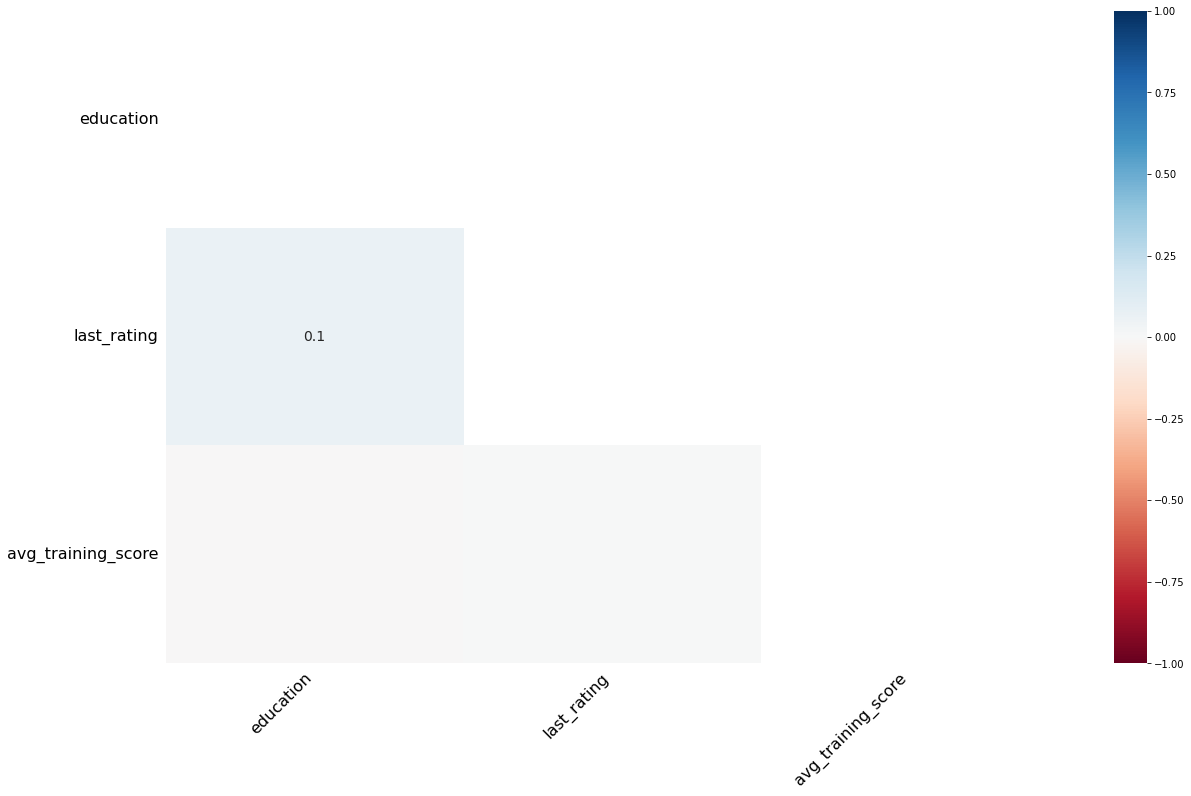

In [ ]:
msno.heatmap(employees_df);

ניתן להבין מהגרף שקיים קשר חלש מאוד בין לדירוג משנה שעברה להשכלה של העובד. בגלל שערך הקשר הוא 0.1 לא נוכל להסתמך עליו ונבדוק אפשרויות נוספות להבנת החוסרים בהמשך.



---


**תיקון הטעויות:**

In [ ]:
# נסתכל על סוגי הערכים של עמודה
employees_df.dtypes

employee_id                  int64
department                  object
education                   object
gender                      object
age                          int64
last_rating                float64
years_in_company             int64
awards_won                   int64
avg_training_score         float64
is_promotion_recomended      int64
dtype: object

In [ ]:
# שמנו לב כי קיימת חוסר התאמה בכמות הספרות בכל אחד ממספרי הזהות של העובדים, ננסה לתקן את הבעיה
employees_df['employee_id'] = pd.to_numeric(employees_df['employee_id'])

In [ ]:
employees_df.sort_values(by=['employee_id']).head(15)
# נראה כי הערכים "employee_id"
# מייצגים מספר סידורי של העובד בחברה ולא את מספר תעודת הזהות של העובד. לכן נשנה את השם של עמודה זו בהמשך.

,employee_id,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended
52690,1,Analytics,Bachelor's,m,29,3.0,5,0,85.0,0
10257,2,Finance,Master's & above,f,35,1.0,2,0,63.0,0
32895,4,Sales & Marketing,Bachelor's,m,25,3.0,2,0,53.0,0
4424,5,Analytics,Master's & above,m,46,3.0,7,0,86.0,0
41261,7,Operations,Bachelor's,m,31,3.0,7,0,59.0,0
48688,8,Sales & Marketing,Bachelor's,m,42,5.0,6,0,52.0,0
50757,9,Sales & Marketing,Bachelor's,m,29,5.0,2,0,50.0,0
44500,10,Operations,Master's & above,m,35,4.0,9,0,60.0,0
993,12,Technology,Bachelor's,m,24,3.0,2,0,77.0,0
28678,14,Operations,Bachelor's,f,38,5.0,8,0,60.0,0


In [ ]:
# בהתאם למסקנתנו מעלה, נבצע שינוי שם לעמודה
employees_df1= employees_df.rename({"employee_id":"employeeSN"}, axis=1)
employees_df1

,employeeSN,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended
0,65438,Sales & Marketing,Master's & above,f,35,5.0,8,0,49.0,0
1,65141,Operations,Bachelor's,m,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,Bachelor's,m,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,Bachelor's,m,39,1.0,10,0,50.0,0
4,48945,Technology,Bachelor's,m,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,48,3.0,17,0,78.0,0
54804,74592,Operations,Master's & above,f,37,2.0,6,0,56.0,0
54805,13918,Analytics,Bachelor's,m,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,NaN,m,29,1.0,2,0,NaN,0


נתקן את הערכים החסרים לפי כל עמודה:

In [ ]:
# education נוכל להחליף מפני שככל הנראה אותו עובד לא רכש השכלה כלל.
employees_df2=employees_df1.fillna({'education':"Not educated"})
employees_df2

,employeeSN,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended
0,65438,Sales & Marketing,Master's & above,f,35,5.0,8,0,49.0,0
1,65141,Operations,Bachelor's,m,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,Bachelor's,m,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,Bachelor's,m,39,1.0,10,0,50.0,0
4,48945,Technology,Bachelor's,m,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,48,3.0,17,0,78.0,0
54804,74592,Operations,Master's & above,f,37,2.0,6,0,56.0,0
54805,13918,Analytics,Bachelor's,m,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,Not educated,m,29,1.0,2,0,NaN,0


In [ ]:
# נמשיך לבדוק חוסרים 
employees_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employeeSN               54808 non-null  int64  
 1   department               54808 non-null  object 
 2   education                54808 non-null  object 
 3   gender                   54808 non-null  object 
 4   age                      54808 non-null  int64  
 5   last_rating              50684 non-null  float64
 6   years_in_company         54808 non-null  int64  
 7   awards_won               54808 non-null  int64  
 8   avg_training_score       52248 non-null  float64
 9   is_promotion_recomended  54808 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 4.2+ MB


In [ ]:
# שמנו לב שלחלק מהעובדים חסר ציון משנה שעברה ומפני שלא הצלחנו להבין מהגרף המראה על קשר סיבתי נתמקד בעמודות המתאימות להערכתנו
employees_df2[employees_df1['last_rating'].isnull()]

,employeeSN,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended
10,29934,Technology,Not educated,m,30,NaN,1,0,77.0,0
23,71177,Procurement,Bachelor's,m,27,NaN,1,0,70.0,0
29,74759,Sales & Marketing,Bachelor's,m,26,NaN,1,0,44.0,0
56,45709,Sales & Marketing,Bachelor's,f,29,NaN,1,0,49.0,0
58,26599,Sales & Marketing,Bachelor's,m,27,NaN,1,0,47.0,0
...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,Bachelor's,m,30,NaN,1,0,88.0,0
54734,11685,Operations,Bachelor's,m,31,NaN,1,0,56.0,1
54746,10546,Finance,Bachelor's,m,28,NaN,1,0,NaN,0
54773,37919,Finance,Bachelor's,m,23,NaN,1,0,NaN,0


In [ ]:
# נסתכל רק על העמודות הרלוונטיות הקשורות בציונים
df_years=employees_df2[["last_rating","years_in_company","awards_won","avg_training_score"]]
df_years

,last_rating,years_in_company,awards_won,avg_training_score
0,5.0,8,0,49.0
1,5.0,4,0,60.0
2,3.0,7,0,50.0
3,1.0,10,0,50.0
4,3.0,2,0,73.0
...,...,...,...,...
54803,3.0,17,0,78.0
54804,2.0,6,0,56.0
54805,5.0,3,0,79.0
54806,1.0,2,0,NaN


In [ ]:
df_years.sort_values(by=['years_in_company']).head(10)
# ככל הנראה אנו מסיקות כי אנשים שעובדים רק שנה אחת בחברה הם כנראה חדשים ולכן לא צברו פרסים ולא קיבלו דירוג משנה שעברה. 
# כל זאת למעט חריגים שכנראה עובדים בחברה תקופה קצרה נניח לדוגמה שנה וחצי.

,last_rating,years_in_company,awards_won,avg_training_score
47806,4.0,1,1,83.0
10509,NaN,1,0,50.0
18237,NaN,1,0,63.0
4499,NaN,1,0,78.0
31974,NaN,1,0,47.0
10522,NaN,1,0,69.0
4492,3.0,1,0,59.0
50492,1.0,1,0,50.0
18225,NaN,1,0,49.0
44807,NaN,1,0,80.0


In [ ]:
# בדקנו מהי השכיחות של משך הזמן של אנשים שעובדים בחברה. מצאנו כי 7,033 עובדים מועסקים בחברה במשך 3 שנים - השכיחות הכי גבוהה.
# נציג נתונים אלו באופן גרפי בהמשך
df_years.value_counts("years_in_company")

years_in_company
3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
dtype: int64

In [ ]:
#כעת ניתן לראות כי עובדים בעלי ותק של שנה אחת בחברה- עובדים חדשים מופיעים ללא ציונים משנה שעברה, נניח שזאת מפני שהם חדשים ולכן לא קיבלו ניקוד. 
# משתנה NaN זה מוסיף לנו מידע ולכן החלטנו שלא נמחק אותו.

In [ ]:
# הוספנו עמודה המציינת מי הם העובדים החדשים שהגדרנו
# נשתמש בעמודה זו בהמשך
employees_df2["is_new"] = employees_df2['years_in_company']==1
employees_df2

,employeeSN,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended,is_new
0,65438,Sales & Marketing,Master's & above,f,35,5.0,8,0,49.0,0,False
1,65141,Operations,Bachelor's,m,30,5.0,4,0,60.0,0,False
2,7513,Sales & Marketing,Bachelor's,m,34,3.0,7,0,50.0,0,False
3,2542,Sales & Marketing,Bachelor's,m,39,1.0,10,0,50.0,0,False
4,48945,Technology,Bachelor's,m,45,3.0,2,0,73.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,48,3.0,17,0,78.0,0,False
54804,74592,Operations,Master's & above,f,37,2.0,6,0,56.0,0,False
54805,13918,Analytics,Bachelor's,m,27,5.0,3,0,79.0,0,False
54806,13614,Sales & Marketing,Not educated,m,29,1.0,2,0,NaN,0,False


In [ ]:
# שמירת הדאטה
employees_df3=employees_df2
employees_df3

,employeeSN,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended,is_new
0,65438,Sales & Marketing,Master's & above,f,35,5.0,8,0,49.0,0,False
1,65141,Operations,Bachelor's,m,30,5.0,4,0,60.0,0,False
2,7513,Sales & Marketing,Bachelor's,m,34,3.0,7,0,50.0,0,False
3,2542,Sales & Marketing,Bachelor's,m,39,1.0,10,0,50.0,0,False
4,48945,Technology,Bachelor's,m,45,3.0,2,0,73.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,48,3.0,17,0,78.0,0,False
54804,74592,Operations,Master's & above,f,37,2.0,6,0,56.0,0,False
54805,13918,Analytics,Bachelor's,m,27,5.0,3,0,79.0,0,False
54806,13614,Sales & Marketing,Not educated,m,29,1.0,2,0,NaN,0,False


In [ ]:
employees_df3.value_counts("is_new")
# ניתן לראות כי 4,547 הם עובדים חדשים בחברה.

is_new
False    50261
True      4547
dtype: int64

In [ ]:
# נמשיך לבחון את הנתונים החברים בעמודה- ציון ממוצע 
employees_df3[employees_df1['avg_training_score'].isnull()]

,employeeSN,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended,is_new
31,58536,Finance,Bachelor's,m,26,1.0,2,0,NaN,0,False
67,16502,Sales & Marketing,Bachelor's,m,27,NaN,1,0,NaN,1,True
128,42068,Operations,Master's & above,m,38,5.0,9,0,NaN,0,False
159,30106,Sales & Marketing,Bachelor's,f,32,4.0,4,0,NaN,0,False
166,4134,Sales & Marketing,Bachelor's,f,39,1.0,8,0,NaN,0,False
...,...,...,...,...,...,...,...,...,...,...,...
54701,23170,Sales & Marketing,Master's & above,m,39,1.0,11,0,NaN,0,False
54736,38707,Operations,Bachelor's,m,34,5.0,6,0,NaN,0,False
54746,10546,Finance,Bachelor's,m,28,NaN,1,0,NaN,0,True
54773,37919,Finance,Bachelor's,m,23,NaN,1,0,NaN,0,True


In [ ]:
# ננסה להבין ולהוכיח או להפריך האם האוכלוסיה שחסרת ציון ממוצע משתייכת יותר ( שכיחה יותר) במחלקה מסויימת בחברה או לקבוצת השכלה מסויימת. 
employees_df3.groupby(["avg_training_score", "department","education" ]).mean().reset_index()

,avg_training_score,department,education,employeeSN,age,last_rating,years_in_company,awards_won,is_promotion_recomended,is_new
0,39.0,Sales & Marketing,Bachelor's,47110.000000,34.500000,1.000000,8.000000,0.000000,0.0,0.000
1,40.0,HR,Bachelor's,17417.000000,39.000000,5.000000,10.000000,0.000000,0.0,0.000
2,40.0,Sales & Marketing,Bachelor's,46166.000000,51.000000,5.000000,19.000000,0.000000,0.0,0.000
3,40.0,Sales & Marketing,Master's & above,22288.000000,38.000000,3.000000,5.000000,0.000000,0.0,0.000
4,40.0,Sales & Marketing,Not educated,48497.000000,24.000000,NaN,1.000000,0.000000,0.0,1.000
...,...,...,...,...,...,...,...,...,...,...
803,99.0,Procurement,Bachelor's,31120.000000,34.428571,3.857143,6.285714,0.285714,1.0,0.000
804,99.0,Sales & Marketing,Bachelor's,41358.125000,35.625000,3.714286,6.750000,0.125000,1.0,0.125
805,99.0,Sales & Marketing,Master's & above,63149.500000,42.000000,4.500000,7.000000,0.250000,1.0,0.000
806,99.0,Technology,Bachelor's,31690.333333,27.333333,4.666667,2.333333,0.000000,1.0,0.000


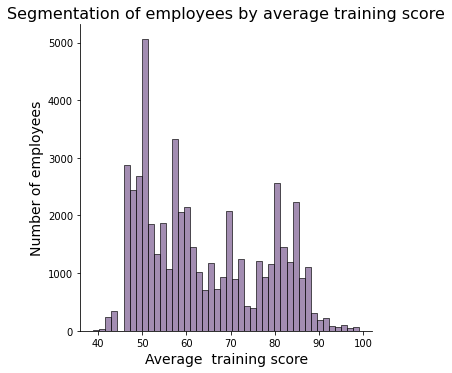

In [ ]:
# ננסה להבין את התפלגות ממוצעי הציונים והאם קיים דפוס כלשהו. נראה שאין מגמה ברורה.
sns.displot(data=employees_df3, x="avg_training_score", color="#856798")
plt.title('Segmentation of employees by average training score', fontsize=16)
plt.xlabel('Average  training score', fontsize=14)
plt.ylabel('Number of employees', fontsize=14);

הגרף מציג את התפלגות כמות העובדים ע"פ ממוצע הציון בהכשרות שעברו. ניתן ללמוד מהגרף שאין התפלגות אחידה אך נראה שישנם מוקדים של ציונים ממוצעים שסביבם נעים רוב הציונים. המוקדים הם בציוני ממוצע של 50, 60, 85.

In [ ]:
# בהתאם לכל הבדיקות שערכנו עד כה
# אנו מסיקות כי העובדים בעלי ציון ממוצע חסר ככל הנראה כן עברו הכשרות כלשהן במהלך תקופת העסקתם במקום העבודה מפני שגם עובדים עם וותק גבוה (מעל 8 שנים) נמצאו ללא ציונים.
# נחליט שלא להגדיר ציון חסר כאפס- לא הוכשר 
# אלא נסתכל על ממוצעי הציונים והציון החציוני, נבין אם יש הבדלים קריטיים ביניהם ונחליט בהתאם לשנות את החוסרים

print(employees_df3['avg_training_score'].mean())
print(employees_df3['avg_training_score'].median())

63.71223778900628
60.0


In [ ]:
# נחליף את החוסרים בהתאם לחציון
# נחליף את הנתונים החסרים:
employees_df3["avg_training_score"].fillna("60",inplace=True)
employees_df3

,employeeSN,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended,is_new
0,65438,Sales & Marketing,Master's & above,f,35,5.0,8,0,49.0,0,False
1,65141,Operations,Bachelor's,m,30,5.0,4,0,60.0,0,False
2,7513,Sales & Marketing,Bachelor's,m,34,3.0,7,0,50.0,0,False
3,2542,Sales & Marketing,Bachelor's,m,39,1.0,10,0,50.0,0,False
4,48945,Technology,Bachelor's,m,45,3.0,2,0,73.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,48,3.0,17,0,78.0,0,False
54804,74592,Operations,Master's & above,f,37,2.0,6,0,56.0,0,False
54805,13918,Analytics,Bachelor's,m,27,5.0,3,0,79.0,0,False
54806,13614,Sales & Marketing,Not educated,m,29,1.0,2,0,60,0,False


In [ ]:
# נוודא שהחוסרים שהושלמו נשמרו באופן מספרי לצורך המשך ניתוחים
employees_df3['avg_training_score'] = pd.to_numeric(employees_df3['avg_training_score'])

In [ ]:
employees_df3.dtypes

employeeSN                   int64
department                  object
education                   object
gender                      object
age                          int64
last_rating                float64
years_in_company             int64
awards_won                   int64
avg_training_score         float64
is_promotion_recomended      int64
is_new                        bool
dtype: object

In [ ]:
# שמירת הדאטה לאחר עדכונים
df=employees_df3
df

,employeeSN,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended,is_new
0,65438,Sales & Marketing,Master's & above,f,35,5.0,8,0,49.0,0,False
1,65141,Operations,Bachelor's,m,30,5.0,4,0,60.0,0,False
2,7513,Sales & Marketing,Bachelor's,m,34,3.0,7,0,50.0,0,False
3,2542,Sales & Marketing,Bachelor's,m,39,1.0,10,0,50.0,0,False
4,48945,Technology,Bachelor's,m,45,3.0,2,0,73.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,48,3.0,17,0,78.0,0,False
54804,74592,Operations,Master's & above,f,37,2.0,6,0,56.0,0,False
54805,13918,Analytics,Bachelor's,m,27,5.0,3,0,79.0,0,False
54806,13614,Sales & Marketing,Not educated,m,29,1.0,2,0,60.0,0,False


In [ ]:
# נמשיך ונבדוק שמא פספסנו חוסרים.
for i in df.columns:
    print (i + ": "+str(sum(df[i].isnull()))+" missing values")

employeeSN: 0 missing values
department: 0 missing values
education: 0 missing values
gender: 0 missing values
age: 0 missing values
last_rating: 4124 missing values
years_in_company: 0 missing values
awards_won: 0 missing values
avg_training_score: 0 missing values
is_promotion_recomended: 0 missing values
is_new: 0 missing values


In [ ]:
missing_val_count_by_column = df.isnull().sum()
missing_val_count_by_column

employeeSN                    0
department                    0
education                     0
gender                        0
age                           0
last_rating                4124
years_in_company              0
awards_won                    0
avg_training_score            0
is_promotion_recomended       0
is_new                        0
dtype: int64

כפי שניתן לראות השלמנו את כל החוסרים למעט ציון משנה שעברה שהחלטנו להשאיר כפי שההוא מפני שגם התצפיות החסרות מוסיפות לנו מידע רלוונטי כפי שהוסבר מעלה.

**הדאטה המסודר:**

In [ ]:
# הדאטה הסופי שאיתו נעבוד בפרויקט:
df

,employeeSN,department,education,gender,age,last_rating,years_in_company,awards_won,avg_training_score,is_promotion_recomended,is_new
0,65438,Sales & Marketing,Master's & above,f,35,5.0,8,0,49.0,0,False
1,65141,Operations,Bachelor's,m,30,5.0,4,0,60.0,0,False
2,7513,Sales & Marketing,Bachelor's,m,34,3.0,7,0,50.0,0,False
3,2542,Sales & Marketing,Bachelor's,m,39,1.0,10,0,50.0,0,False
4,48945,Technology,Bachelor's,m,45,3.0,2,0,73.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,48,3.0,17,0,78.0,0,False
54804,74592,Operations,Master's & above,f,37,2.0,6,0,56.0,0,False
54805,13918,Analytics,Bachelor's,m,27,5.0,3,0,79.0,0,False
54806,13614,Sales & Marketing,Not educated,m,29,1.0,2,0,60.0,0,False


# 5. מידע סטטיסטי כללי על הדאטה

In [ ]:
# נסתכל על ערכי הקטגוריות בהתאם לדאטה המסודר לצורכי נוחות ויצירת גרפים מתאימים
df.dtypes

employeeSN                   int64
department                  object
education                   object
gender                      object
age                          int64
last_rating                float64
years_in_company             int64
awards_won                   int64
avg_training_score         float64
is_promotion_recomended      int64
is_new                        bool
dtype: object

על מנת להבין לעומק את הנתונים איתם אנו עובודות, כבכל עבודה מחקרית אנו נבחן מידע סטטיסטי תיאורי על הדאטה ורק לאחר מכן ננתח אותו באמצעות שאלות עומק.

In [ ]:
# נסתכל על מחלקות העובדים
df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

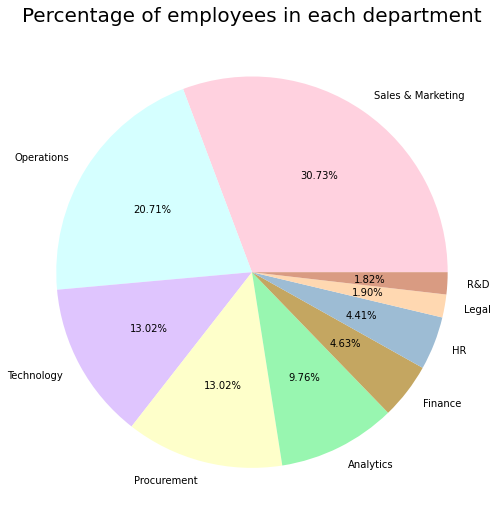

In [ ]:
counts = df['department'].value_counts()
labels = ['Sales & Marketing', 'Operations','Technology', 'Procurement', 'Analytics', 'Finance', 'HR', 'Legal','R&D']
colors = ['#ffd1df', '#d5ffff', '#dfc5fe', '#feffca', '#98f6b0', '#c4a661', '#9dbcd4', '#ffd8b1', '#d99b82'] #for colors https://xkcd.com/color/rgb/
plt.figure(figsize=(18, 9))
plt.pie(counts, labels=labels, autopct="%0.2f%%", colors=colors);
plt.title("Percentage of employees in each department", fontsize=20);

 הגרף מציג פילוח של אחוז העובדים בכל אחת מהמחלקות השונות בחברה, ניתן ללמוד מכך שרוב העובדים בחברה הם ממחלקת השיווק ומכירות וממחלקת התפעול, והאחוזים הנמוכים של העובדים הם ממחלקות מחקר ופיתוח והמחלקה המשפטית

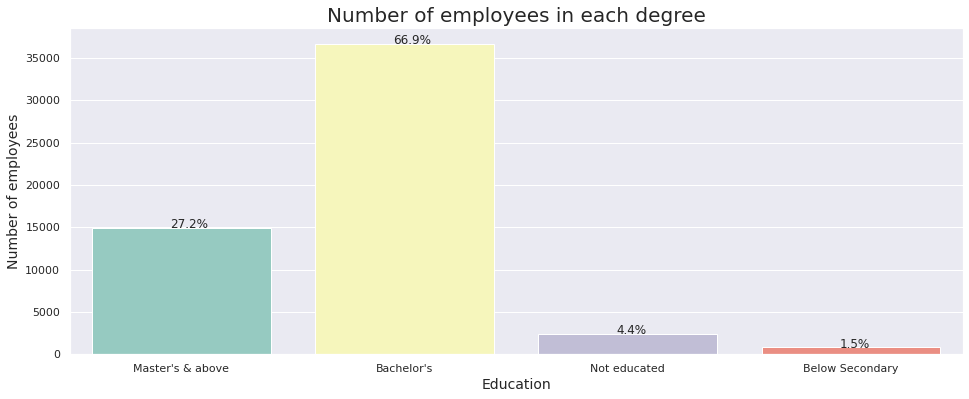

In [ ]:
# נסתכל על השכלת העובדים 
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax= sns.countplot(data=df, x="education", palette="Set3")
ax.set_title("Number of employees in each degree" , fontsize=20)
ax.set_ylabel('Number of employees', fontsize=14)
ax.set_xlabel('Education', fontsize=14)

total = len(df['education'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

# לצורך הוספת האחוזים השתמשנו בפונקציה הבאה מאתר https://datascience.stackexchange.com/questions/48035/how-to-show-percentage-text-next-to-the-horizontal-bars-in-matplotlib 
# לעיצוב הגרף נעזרנו באתר-  https://seaborn.pydata.org/generated/seaborn.countplot.html

הגרף מציג פילוח של מספר העובדים מהתארים השונים ואחוזים מכלל העובדים בעבודה. ניתן ללמוד מהגרף כי רוב העובדים כ- 66.9% הם בעלי תואר ראשון, והשאר הם בעלי תואר שני ומעלה. כ4.4% הם ללא תארים כלל.

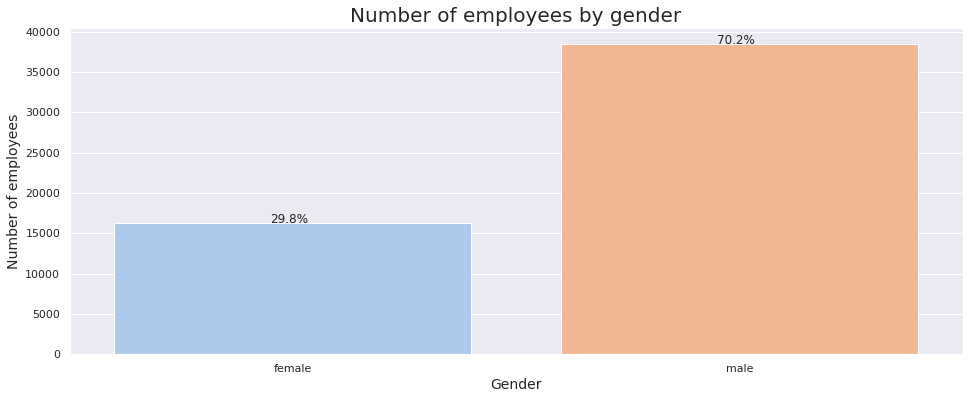

In [ ]:
# נסתכל על מגדר
plt.figure(figsize=(16, 6))
titanic = sns.load_dataset("titanic")
ax= sns.countplot(data=df, x="gender", palette="pastel")
ax.set_title("Number of employees by gender" , fontsize=20)
ax.set_ylabel('Number of employees', fontsize=14)
ax.set_xlabel('Gender', fontsize=14)
ax.set_xticklabels(["female","male"])

total = len(df['gender'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

# לצורך הוספת האחוזים השתמשנו בפונקציה הבאה מאתר https://datascience.stackexchange.com/questions/48035/how-to-show-percentage-text-next-to-the-horizontal-bars-in-matplotlib 
# לעיצוב הגרף נעזרנו באתר-  https://seaborn.pydata.org/generated/seaborn.countplot.html

הגרף מציג פילוח בחלוקה לגברים ונשים לפי מספר ואחוז. ניתן לראות כי יש רוב של גברים כ- 70.2% לעומת כ -29.8% של נשים

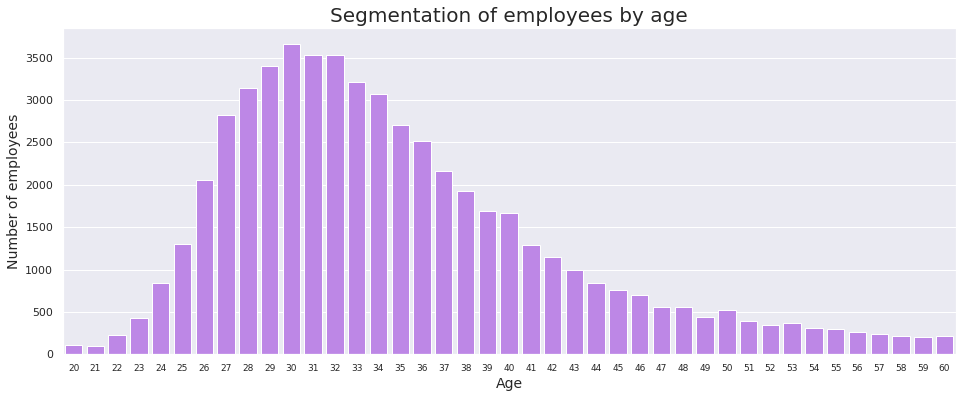

In [ ]:
# נסתכל על גילאי העובדים
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x="age", color="#bf77f6")
plt.xticks( fontsize=9)
plt.title('Segmentation of employees by age', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of employees', fontsize=14);

הגרף מציג התפלגות של העובדים בחברה ע"פ גיל . ניתן ללמוד מהגרף שישנה התפלגות              א-סימטרית ימנית כלומר שרוב העובדים הם בגילאים בין  30-32 ומעט עובדים בגילאים מבוגרים.

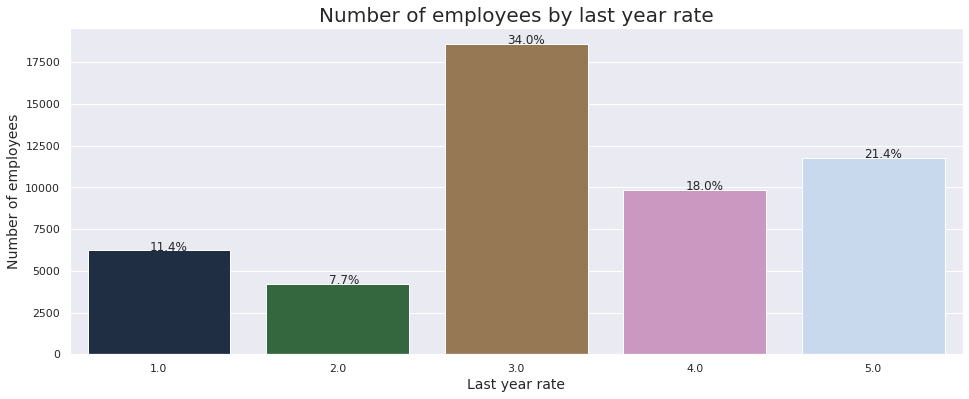

In [ ]:
# נסתכל על הדירוג שהעובדים קיבלו בשנה שעברה
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax= sns.countplot(data=df, x="last_rating", palette= "cubehelix")
ax.set_title("Number of employees by last year rate" , fontsize=20)
ax.set_ylabel('Number of employees', fontsize=14)
ax.set_xlabel('Last year rate', fontsize=14)

total = len(df['last_rating'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

# לצורך הוספת האחוזים השתמשנו בפונקציה הבאה מאתר https://datascience.stackexchange.com/questions/48035/how-to-show-percentage-text-next-to-the-horizontal-bars-in-matplotlib 
# לעיצוב הגרף נעזרנו באתר-  https://seaborn.pydata.org/generated/seaborn.countplot.html

הגרף מציג את אחוז ומספר העובדים שדורגו בכל אחד מהציונים בין 1-5 .
ניתן ללמוד כי רוב העובדים דורגו בציון 3 ( כ- 34% ) והכי מעט דורגו בציון 2 .

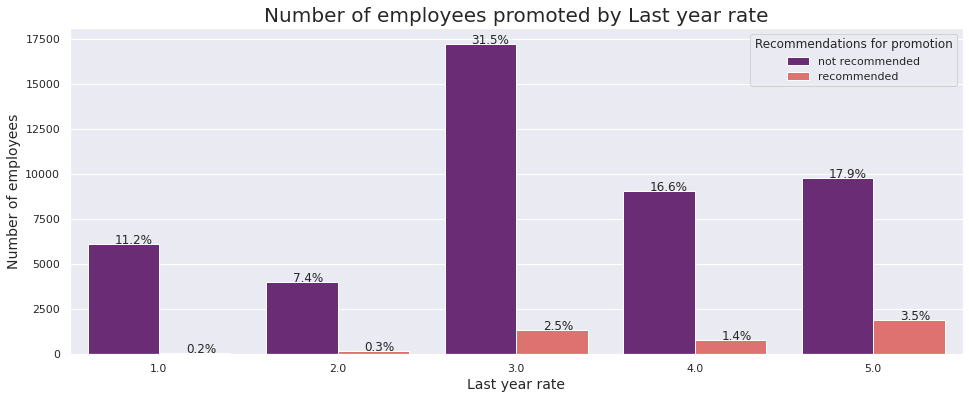

In [ ]:
 #נבין את הקשר בין גובה הציון להמלצה לקידום
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax= sns.countplot(data=df, x="last_rating", hue="is_promotion_recomended", palette= "magma")
ax.set_title("Number of employees promoted by Last year rate" , fontsize=20)
ax.set_ylabel('Number of employees', fontsize=14)
ax.set_xlabel('Last year rate', fontsize=14)
plt.legend(title='Recommendations for promotion', labels=["not recommended", 'recommended'])


total = len(df['last_rating'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

הגרף מציג את מספר העובדים שהומלצו לקידום לפי הדירוג השנתי הקודם שקיבלו, במספר ובאחוזים. הצבע הסגול מייצג את מספר האנשים שלא הומלצו לקידום והצבע הוורוד מייצג את מספר העובדים שהומלצו לקידום. החלטנו להפיק גרף זה כתוצאה מהגרף הקודם שקיבלנו בכדי לדעת יותר ולהבין איך הדירוג השנתי של כל עובד משפיע על קידומו, ולא רק באופן כמותי.

Text(0, 0.5, 'Number of employees')

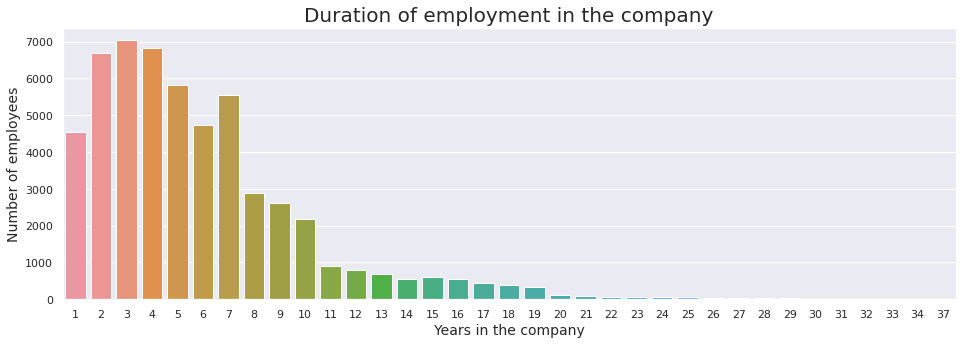

In [ ]:
# נסתכל על ותק העובדים בחברה
plt.figure(figsize=(16, 5))
ax= sns.countplot(data=df, x="years_in_company")

plt.title('Duration of employment in the company', fontsize=20)
plt.xlabel('Years in the company', fontsize=14)
plt.ylabel('Number of employees', fontsize=14)

הגרף מציג את כמות העובדים בחלוקה ע"פ מספר השנים של העובדים בחברה. ניתן ללמוד כי רוב העובדים הם בעלי וותק של 2-4 שנים, וכי הוותק הגבוהה ביותר(25 שנה) הוא בעל המספר הכי קטן של עובדים

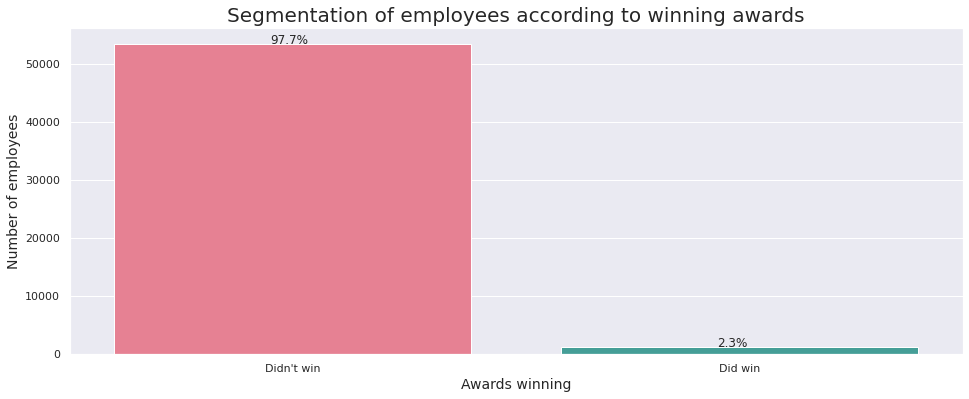

In [ ]:
# נסתכל על זכיה בפרסים
plt.figure(figsize=(16, 6))
ax= sns.countplot(data=df, x="awards_won", palette= "husl")

plt.title('Segmentation of employees according to winning awards', fontsize=20)
plt.xlabel('Awards winning', fontsize=14)
plt.ylabel('Number of employees', fontsize=14)
ax.set_xticklabels(["Didn't win", 'Did win'])

total = len(df['awards_won'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))


הגרף מציג את התפלגות העובדים באחוזים ומספר ע"פ זכייה בפרסים. ניתן ללמוד כי רוב מוחלט של עובדים לא זכו בפרסים (97.7 %) , ניתן להסיק מכך שקבלת פרס הוא לא דבר של מה בכך, וכל הנראה מוענק לעובדים הטובים ביותר.

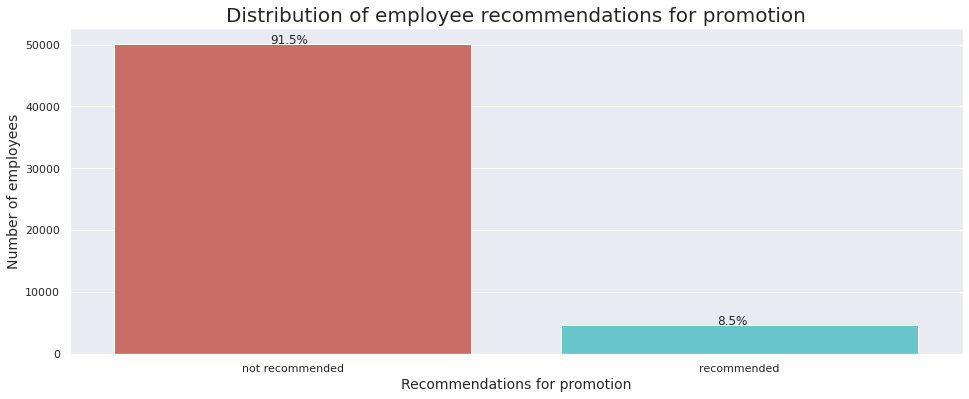

In [ ]:
# נסתכל על המלצות לקידום
plt.figure(figsize=(16, 6))
ax= sns.countplot(data=df, x="is_promotion_recomended", palette= "hls")

plt.title('Distribution of employee recommendations for promotion', fontsize=20)
plt.xlabel('Recommendations for promotion', fontsize=14)
plt.ylabel('Number of employees', fontsize=14)
ax.set_xticklabels(["not recommended", 'recommended'])

total = len(df['is_promotion_recomended'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))


הגרף מציג את פילוח העובדים באחוז ומספר שהומלצו לקידום או לא הומלצו. ניתן לראות כי ישנו רוב מוחלט של (91.5% ) עובדים שלא הומלצו לקידום. מכך אנו מסיקות שלא קל ליהיות מומלץ לקידום בחברה.

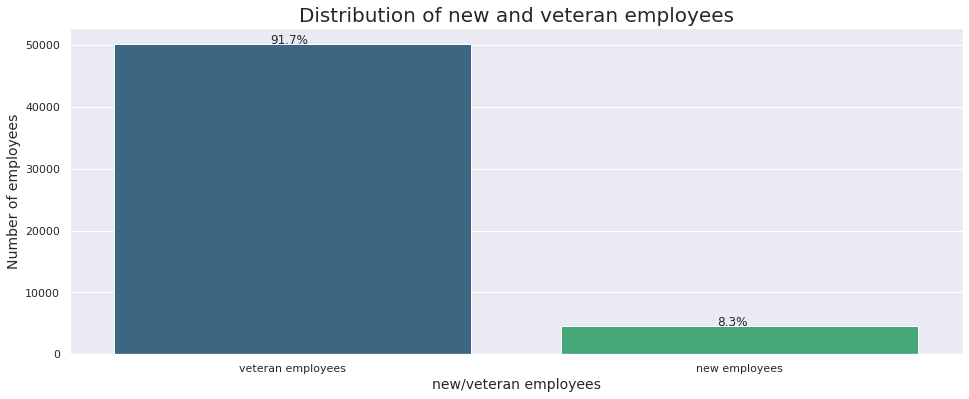

In [ ]:
# נסתכל על ותק העובד על פי העמודה שהוספנו
plt.figure(figsize=(16, 6))
ax= sns.countplot(data=df, x="is_new", palette= "viridis");

plt.title('Distribution of new and veteran employees', fontsize=20)
plt.xlabel('new/veteran employees', fontsize=14)
plt.ylabel('Number of employees', fontsize=14)
ax.set_xticklabels(["veteran employees", 'new employees'])

total = len(df['is_new'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))


הגרף מציג את פילוח העובדים לעובדים ותיקים ועובדים חדשים באחוז ומספר. ניתן לראות כי ישנו רוב מוחלט(91.7 %)  של עובדים וותקים ( מעל שנה ) בחברה. ניתן להסיק שהעובדים בחברה נשארים בה לאורך זמן כך שאין צורך בגיוס גדול של עובדים חדשים.

# 6. ניתוח שאלות

# שאלה ראשונה

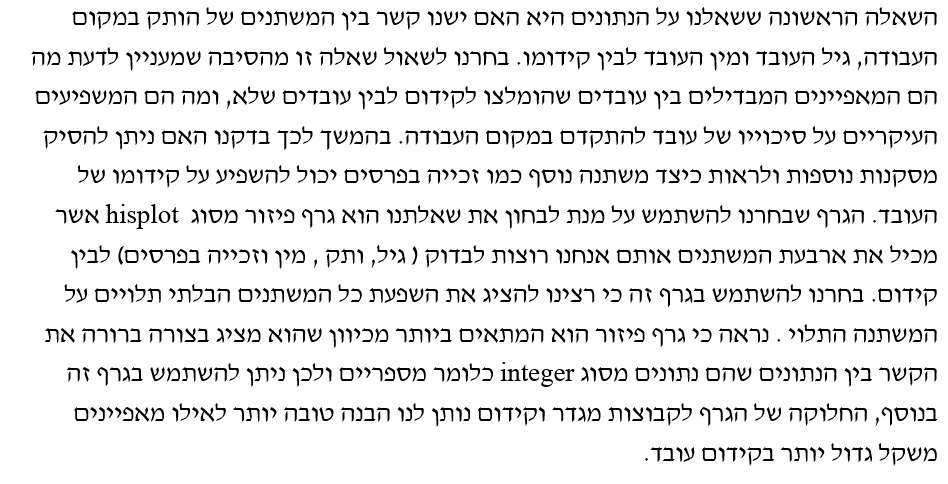

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


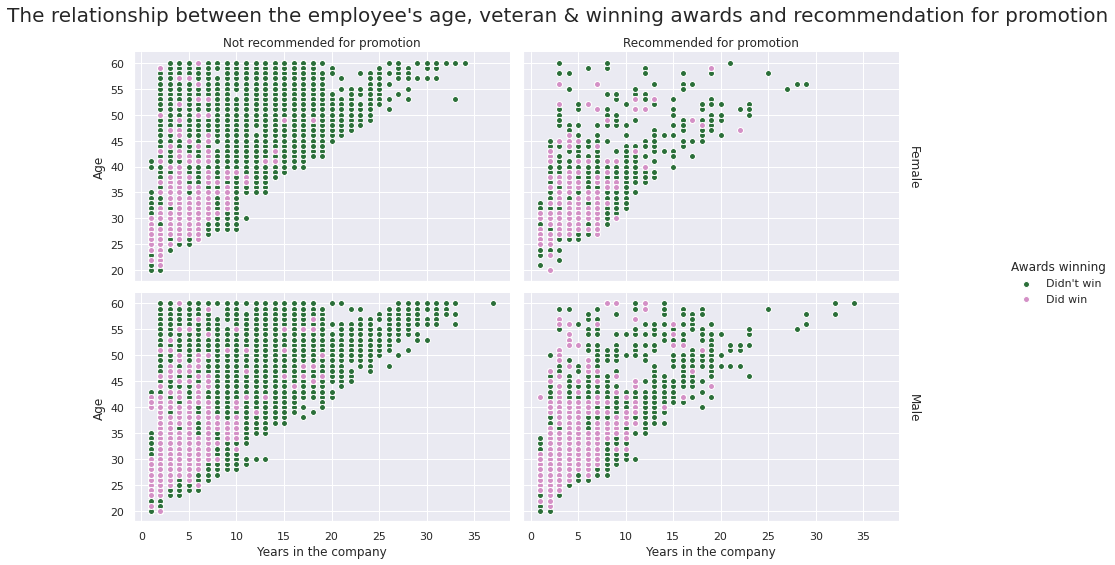

In [ ]:
g = sns.FacetGrid(data=df ,hue="awards_won", row="gender", col="is_promotion_recomended", margin_titles=True, palette ='cubehelix',  height=4, aspect=1.5)
g.map(sns.scatterplot, "years_in_company", "age", linewidth=1);
g.set_axis_labels("Years in the company", "Age")
axes=g.axes.flatten()
axes[0].set_title("Not recommended for promotion") 
axes[1].set_title("Recommended for promotion")

ratio_labels =  ["",
             "Female",
             "",
             "Male"]
for i, ax in enumerate(g.axes.flat):
    plt.setp(ax.texts, text=ratio_labels[i])

# למדנו כיצד לשנות את הכותרות דרך האתר- https://stackoverflow.com/questions/54052286/how-to-customize-automatic-row-labels-in-seaborn-facetgrid-how-to-get-single-xl
g.add_legend(title='Awards winning', labels=["Didn't win", 'Did win']);


g.fig.subplots_adjust(top=0.9);
g.fig.suptitle("The relationship between the employee's age, veteran & winning awards and recommendation for promotion",fontsize=20);

ניתוח הגרף:

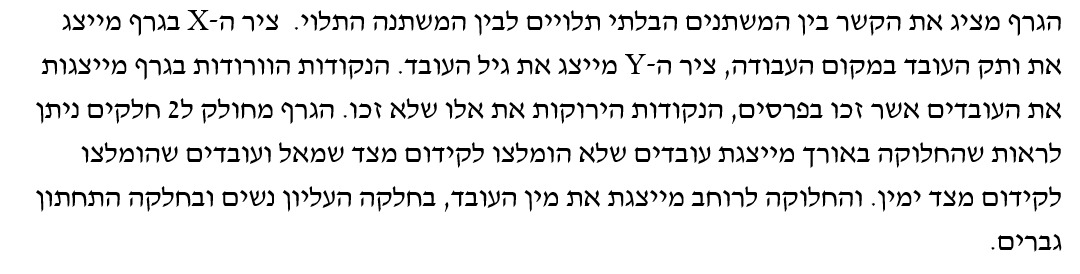

תוצאות השאלה הראשונה:

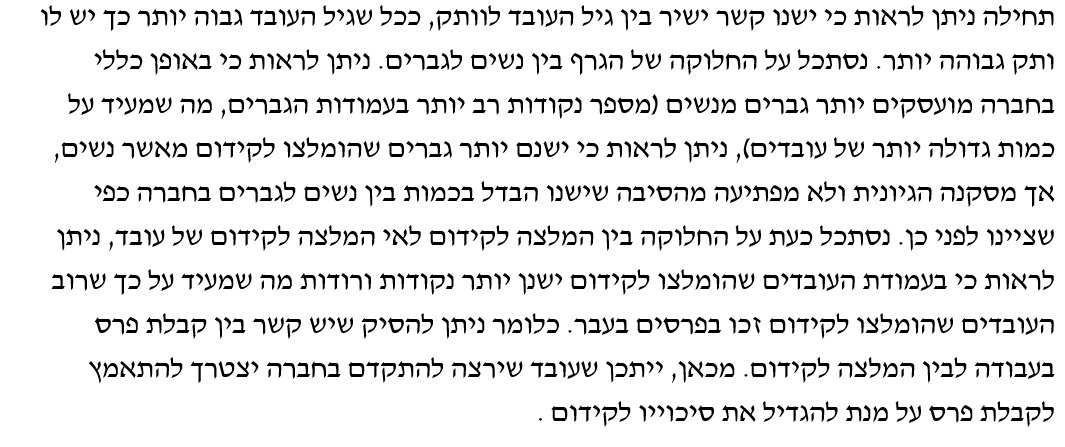

# שאלה שנייה

השאלה השניה שבחרנו לבחון עוסקת בחלוקה לדורות אליה שייכים העובדים.

לצורך כל נדרשת עבודה מקדימה כפי שנפרט בהמשך.

ראשית, בדקנו מהי החלוקה לדורות לפי שנים בהתאם לתמונה שצירפנו מטה. 

התמונה נשמרה מהאתר המופיע ביקשור המצורף.

https://www.pewresearch.org/fact-tank/2019/01/17/where-millennials-end-and-generation-z-begins/

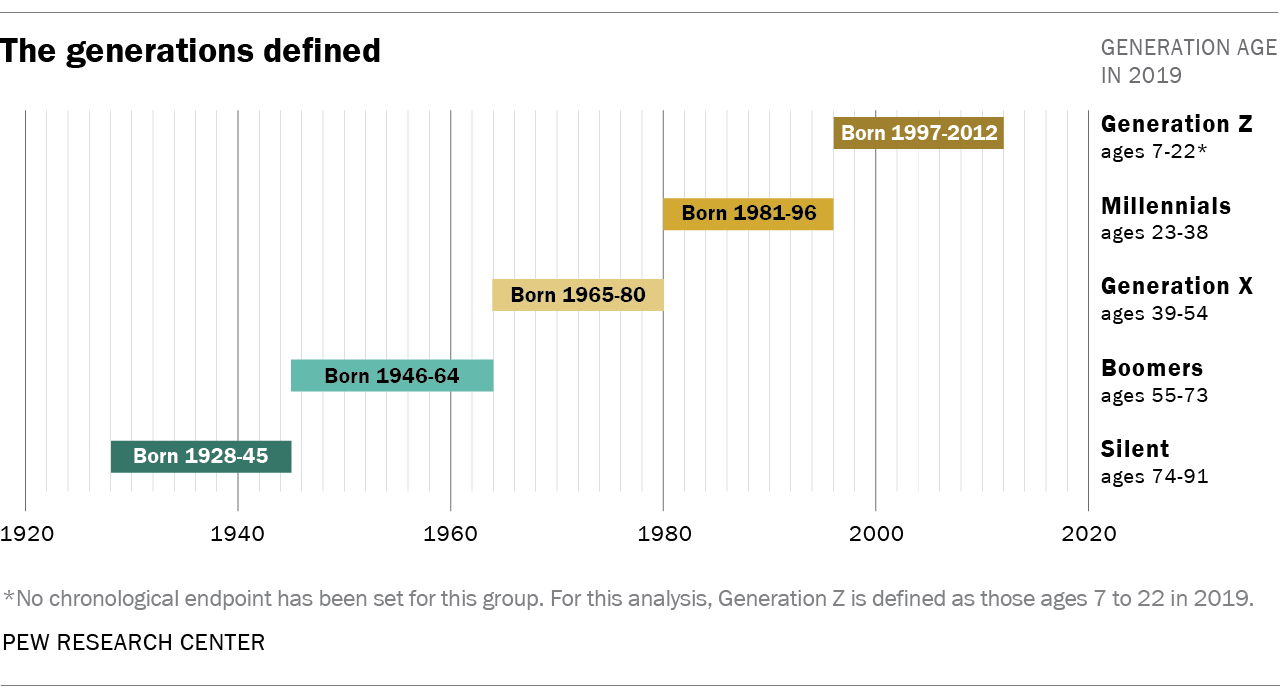

In [ ]:
# כעת, נחשב את טווחי הגילאים המאפיינים את הדורות 
print(2020-1928, 2020-1945)
print(2020-1946, 2020-1964)
print(2020-1965, 2020-1980)
print(2020-1981, 2020-1996)
print(2020-1997, 2020-2012)

92 75
74 56
55 40
39 24
23 8


In [ ]:
# נסתכל מהו הגיל המינימאלי והמקסימאלי של העובדים הנתונים בדאטה שלנו
df["age"].describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [ ]:
# נסווג את גילאי העובדים בהתאם לחלוקה לדורות שלמדנו
def gen_group(series):
    if series <= 23:
        return "gen_z"
    elif 24 <= series < 40:
        return "gen_y"
    elif 40 <= series <= 55:
        return "gen_x"
    elif 55 < series:
        return "baby_boomers"

df['gen_group'] = df ['age'].apply(gen_group)

In [ ]:
# לסיכום, נסתכל כמה עובדים מצויים בכל דור
df["gen_group"].value_counts()

gen_y           41613
gen_x           11184
baby_boomers     1141
gen_z             870
Name: gen_group, dtype: int64

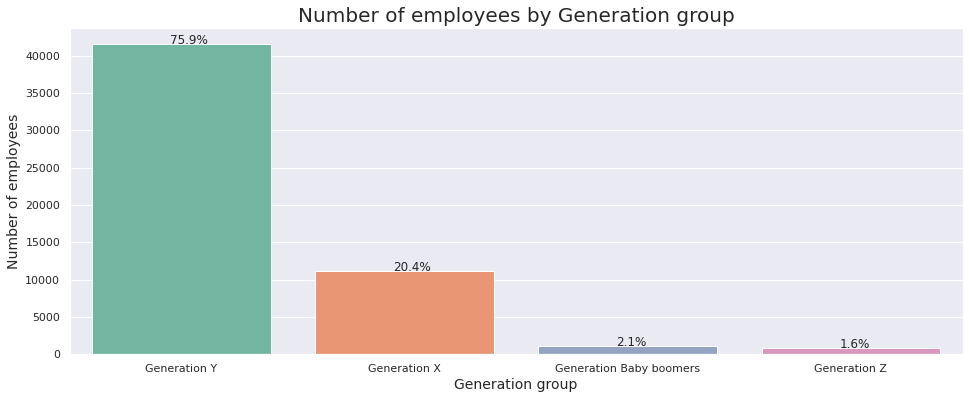

In [ ]:
# פילוח הדורות לפי אחוזים 
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax= sns.countplot(data=df, x="gen_group", palette= "Set2")
ax.set_title("Number of employees by Generation group" , fontsize=20)
ax.set_ylabel('Number of employees', fontsize=14)
ax.set_xlabel('Generation group', fontsize=14)
ax.set_xticklabels(["Generation Y", 'Generation X', 'Generation Baby boomers', 'Generation Z'])

total = len(df['gen_group'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))



---
השאלה השניה:


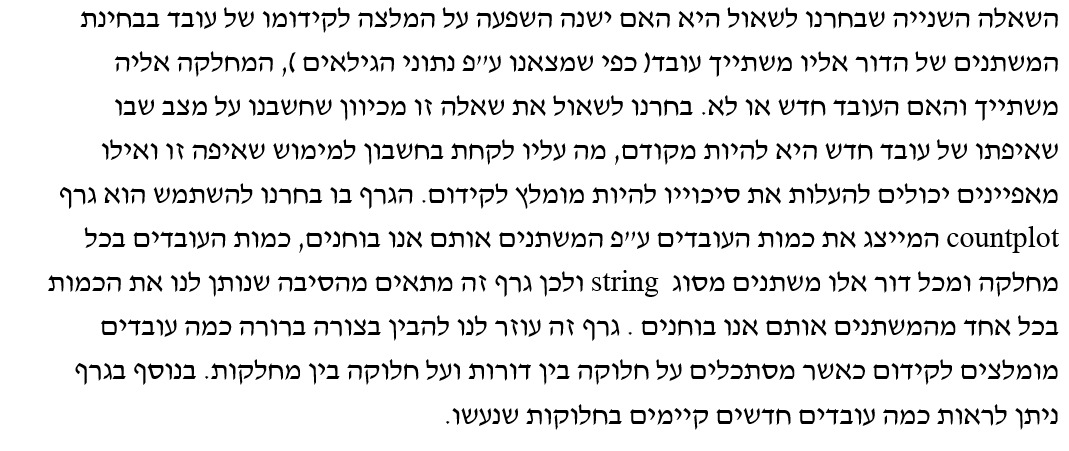

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


Text(0.5, 0.98, 'The relationship between the department, employee seniority & recommendation for promotion')

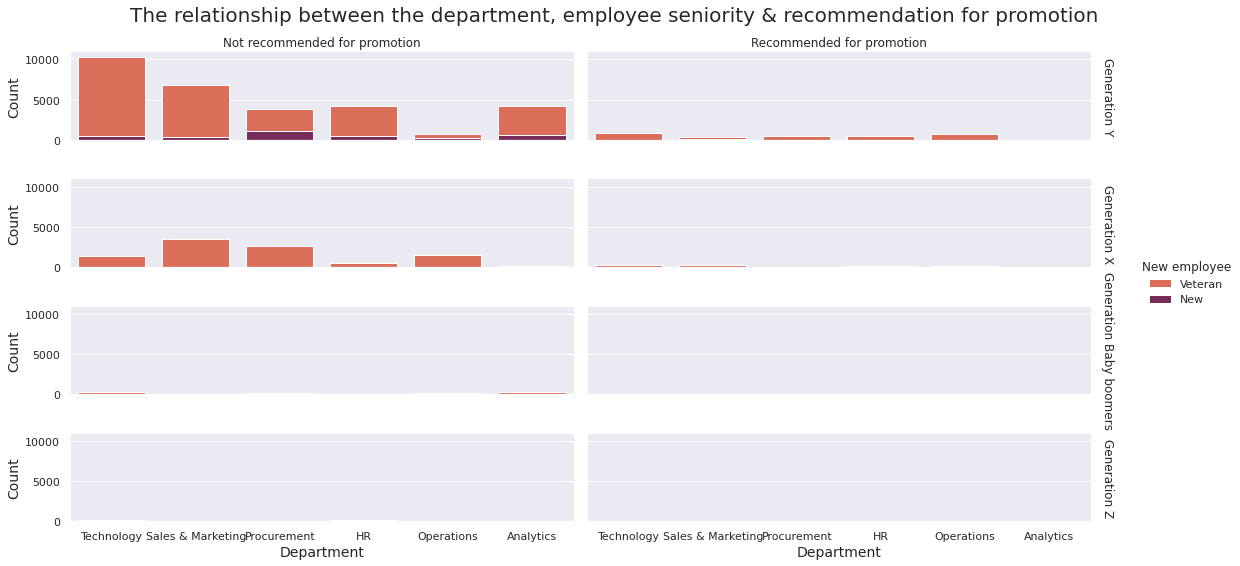

In [ ]:
df.education.value_counts().index
g = sns.FacetGrid(data=df ,hue="is_new", row="gen_group", col="is_promotion_recomended", margin_titles=True,height=2, aspect=4, palette ='rocket_r')
g.map(sns.countplot, "department")
g.set_axis_labels("Department", "Count",fontsize=14 )

g.add_legend(title='New employee', labels=["Veteran", 'New'])

axes=g.axes.flatten()
axes[0].set_title("Not recommended for promotion") 
axes[1].set_title("Recommended for promotion")

ratio_labels =  ["",
             "Generation Y",
             "",
             "Generation X",
             "",
             "Generation Baby boomers",
             "",
             "Generation Z"]
for i, ax in enumerate(g.axes.flat):
    plt.setp(ax.texts, text=ratio_labels[i])


g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("The relationship between the department, employee seniority & recommendation for promotion",fontsize=20)

ניתוח הגרף:

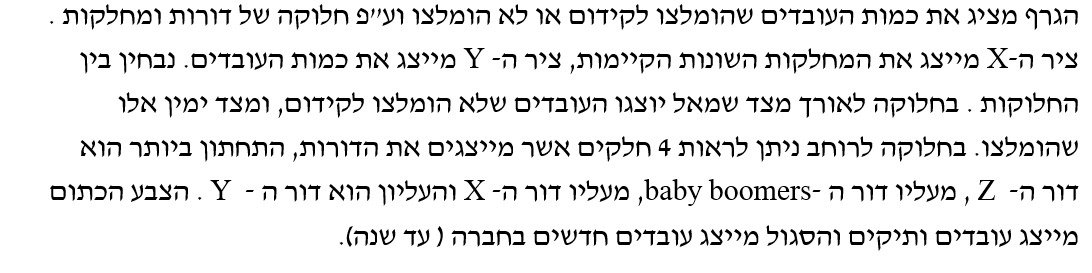

תוצאות השאלה השניה:

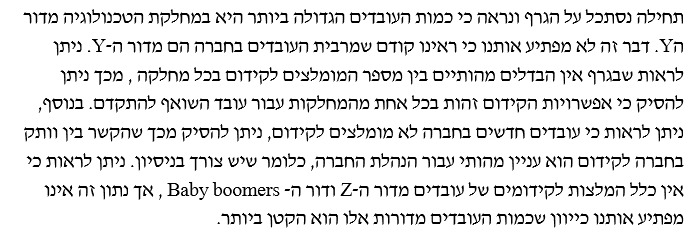

# שאלה 3

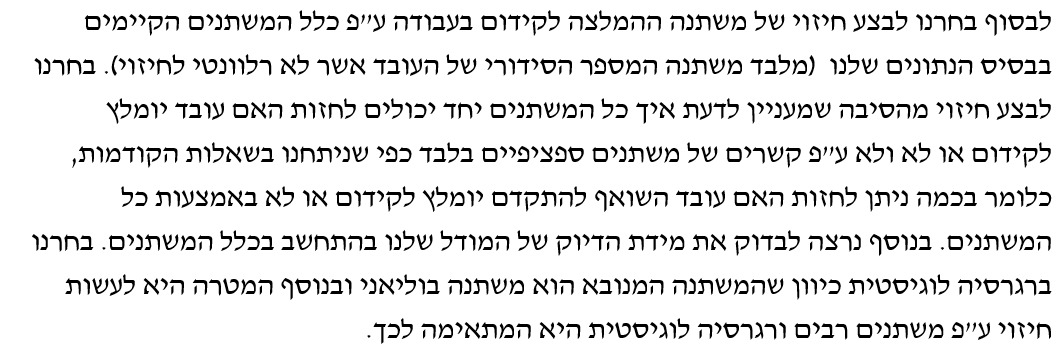

In [ ]:
# כפי שלמדנו לא ניתן לבצע חיזוי רגרסיה על דאטה עם נתונים חסרים, ולכן נתקן זאת
for i in df.columns:
    print (i + ": "+str(sum(df[i].isnull()))+" missing values")

employeeSN: 0 missing values
department: 0 missing values
education: 0 missing values
gender: 0 missing values
age: 0 missing values
last_rating: 4124 missing values
years_in_company: 0 missing values
awards_won: 0 missing values
avg_training_score: 0 missing values
is_promotion_recomended: 0 missing values
is_new: 0 missing values
gen_group: 0 missing values


In [ ]:
# נחליף את הנתונים החסרים בעמודה דירוג שמנה שעברה ב"לא מדורג" למרות שאנו יודעות שכן יש משמעות לדירוג.
# למרות זאת, החלפה זו חסרת משמעות והיא רק לצורך טכני
df1=df["last_rating"].fillna("no_rate",inplace=True)
df1

In [ ]:
# נבדוק שוב שאכן לא נותרו חוסרים
for i in df.columns:
    print (i + ": "+str(sum(df[i].isnull()))+" missing values")

employeeSN: 0 missing values
department: 0 missing values
education: 0 missing values
gender: 0 missing values
age: 0 missing values
last_rating: 0 missing values
years_in_company: 0 missing values
awards_won: 0 missing values
avg_training_score: 0 missing values
is_promotion_recomended: 0 missing values
is_new: 0 missing values
gen_group: 0 missing values


In [ ]:
# שינוי למשתנים בוליאנים
# נשמור לאחר השינויים
dfneww=pd.get_dummies(df,drop_first=True)
dfneww

,employeeSN,age,years_in_company,awards_won,avg_training_score,is_promotion_recomended,is_new,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,education_Not educated,gender_m,last_rating_2.0,last_rating_3.0,last_rating_4.0,last_rating_5.0,last_rating_no_rate,gen_group_gen_x,gen_group_gen_y,gen_group_gen_z
0,65438,35,8,0,49.0,0,False,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
1,65141,30,4,0,60.0,0,False,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,7513,34,7,0,50.0,0,False,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
3,2542,39,10,0,50.0,0,False,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,48945,45,2,0,73.0,0,False,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,48,17,0,78.0,0,False,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
54804,74592,37,6,0,56.0,0,False,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
54805,13918,27,3,0,79.0,0,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
54806,13614,29,2,0,60.0,0,False,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
# נסתכל על העמודות החדשות שקיבלנו
dfneww.columns

Index(['employeeSN', 'age', 'years_in_company', 'awards_won',
       'avg_training_score', 'is_promotion_recomended', 'is_new',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Below Secondary', 'education_Master's & above',
       'education_Not educated', 'gender_m', 'last_rating_2.0',
       'last_rating_3.0', 'last_rating_4.0', 'last_rating_5.0',
       'last_rating_no_rate', 'gen_group_gen_x', 'gen_group_gen_y',
       'gen_group_gen_z'],
      dtype='object')

In [ ]:
# נבנה מודל רגרסיה לוגיסטית
X = dfneww[['age', 'years_in_company', 'awards_won',
       'avg_training_score', 'is_new',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Below Secondary', "education_Master's & above",
       'education_Not educated', 'gender_m', 'last_rating_2.0',
       'last_rating_3.0', 'last_rating_4.0', 'last_rating_5.0',
       'last_rating_no_rate']]
y = dfneww["is_promotion_recomended"].values

logreg = LogisticRegression()
logreg.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# נחלק למשתנים בוחנים ומנבאים
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state=123)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

logreg.fit(X_train, y_train);

Train set: (38365, 22) (38365,)
Test set: (16443, 22) (16443,)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
predictions=logreg.predict(X_test)
cm=confusion_matrix(y_test,predictions)
print(cm)

[[15052    24]
 [ 1160   207]]


In [ ]:
score = accuracy_score(y_test,predictions)
print('Accuracy :',score)

Accuracy : 0.9279936751201119


הסבר על הפקודות לבניית מודל הרגרסיה:

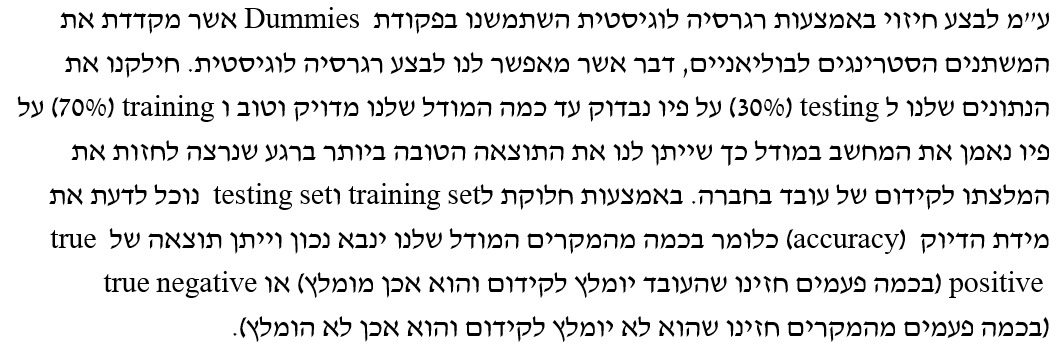

תוצאות מודל הרגרסיה:

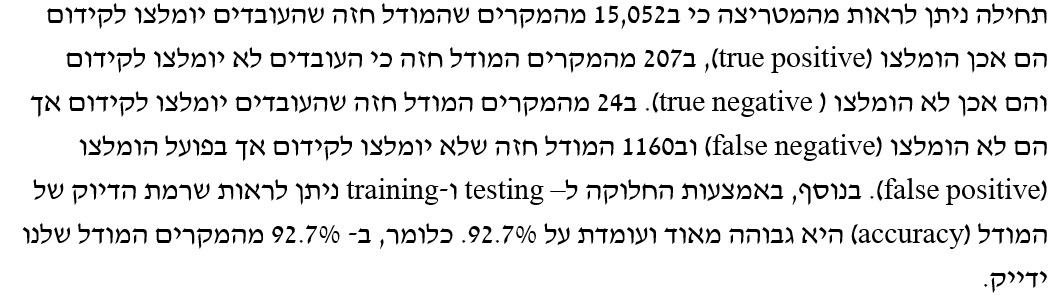

# דיון והמלצות להמשך

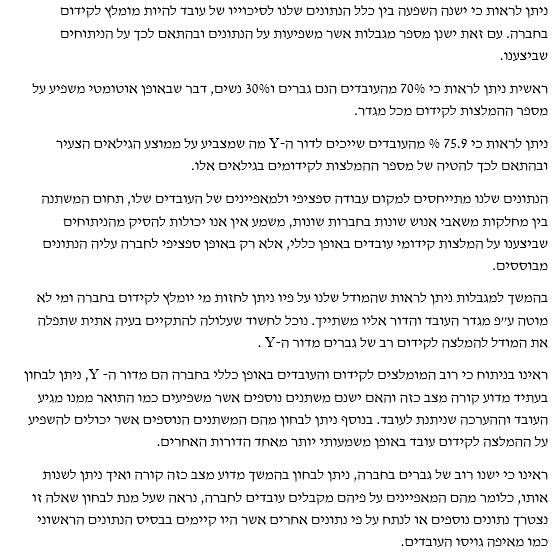